# IMDB Top 250 Movies

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка и просмотр данных

In [20]:
df = pd.read_csv('movies.csv.zip')

In [21]:
df.head(2)

,rank,movie_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_id,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content
0,1,tt0111161,The Shawshank Redemption,1994,https://www.imdb.com/title/tt0111161,"2,711,075",9.3,R,2h 22m,Drama,...,nm0001104,Frank Darabont,"nm0000175,nm0001104","Stephen King,Frank Darabont","Over the course of several years, two convicts...","ur16161013,ur15311310,ur0265899,ur16117882,ur1...","hitchcockthelegend,Sleepin_Dragon,EyeDunno,ale...","rw2284594,rw6606154,rw1221355,rw1822343,rw1288...","Some birds aren't meant to be caged.,An incred...",The Shawshank Redemption is written and direct...
1,2,tt0068646,The Godfather,1972,https://www.imdb.com/title/tt0068646,"1,882,829",9.2,R,2h 55m,"Crime,Drama",...,nm0000338,Francis Ford Coppola,"nm0701374,nm0000338","Mario Puzo,Francis Ford Coppola",The aging patriarch of an organized crime dyna...,"ur24740649,ur86182727,ur15794099,ur15311310,ur...","CalRhys,andrewburgereviews,gogoschka-1,Sleepin...","rw3038370,rw4756923,rw4059579,rw6568526,rw1897...","The Pinnacle Of Flawless Films!,An offer so go...",'The Godfather' is the pinnacle of flawless fi...


In [22]:
df.columns

Index(['rank', 'movie_id', 'title', 'year', 'link', 'imbd_votes',
       'imbd_rating', 'certificate', 'duration', 'genre', 'cast_id',
       'cast_name', 'director_id', 'director_name', 'writer_id', 'writer_name',
       'storyline', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            250 non-null    int64  
 1   movie_id        250 non-null    object 
 2   title           250 non-null    object 
 3   year            250 non-null    int64  
 4   link            250 non-null    object 
 5   imbd_votes      250 non-null    object 
 6   imbd_rating     250 non-null    float64
 7   certificate     249 non-null    object 
 8   duration        250 non-null    object 
 9   genre           250 non-null    object 
 10  cast_id         250 non-null    object 
 11  cast_name       250 non-null    object 
 12  director_id     250 non-null    object 
 13  director_name   250 non-null    object 
 14  writer_id       250 non-null    object 
 15  writer_name     250 non-null    object 
 16  storyline       250 non-null    object 
 17  user_id         250 non-null    obj

In [24]:
df.describe()

,rank,year,imbd_rating
count,250.000000,250.000000,250.000000
mean,125.500000,1986.360000,8.306800
std,72.312977,25.125356,0.229006
min,1.000000,1921.000000,8.000000
25%,63.250000,1966.250000,8.100000
50%,125.500000,1994.000000,8.200000
75%,187.750000,2006.000000,8.400000
max,250.000000,2022.000000,9.300000


## Проверяем на пропущенные значения

In [25]:
df.isnull().sum()

rank              0
movie_id          0
title             0
year              0
link              0
imbd_votes        0
imbd_rating       0
certificate       1
duration          0
genre             0
cast_id           0
cast_name         0
director_id       0
director_name     0
writer_id         0
writer_name       0
storyline         0
user_id           0
user_name         0
review_id         0
review_title      0
review_content    0
dtype: int64

In [28]:
# смотрим у какого фильма пропушено значение
df[df['certificate'].isnull()]

,rank,movie_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_id,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content
76,77,tt0082096,The Boat,1981,https://www.imdb.com/title/tt0082096,"253,534",8.4,NaN,2h 29m,"Drama,War",...,nm0000583,Wolfgang Petersen,"nm0000583,nm0118164","Wolfgang Petersen,Lothar G. Buchheim",A German U-boat stalks the frigid waters of th...,"ur1298472,ur2467618,ur2488512,ur20961309,ur266...","jaywolfenstien,planktonrules,claudio_carvalho,...","rw1051627,rw1418315,rw3867480,rw2355307,rw6345...","Epic,Probably the greatest WWII naval movie,Ge...","What impresses me the most about the film, as ..."


In [13]:
df['certificate'].unique()

array(['R', 'PG-13', 'Approved', 'PG', '18+', 'Not Rated', 'G', 'Passed',
       nan, 'TV-PG', 'Unrated', 'X', '13+', 'TV-MA', 'GP'], dtype=object)

In [30]:
#заменяем рейтинг
df['certificate'] = df['certificate'].replace(np.nan,'R')

Text(0.5, 1.0, 'Популярность рейтингов')

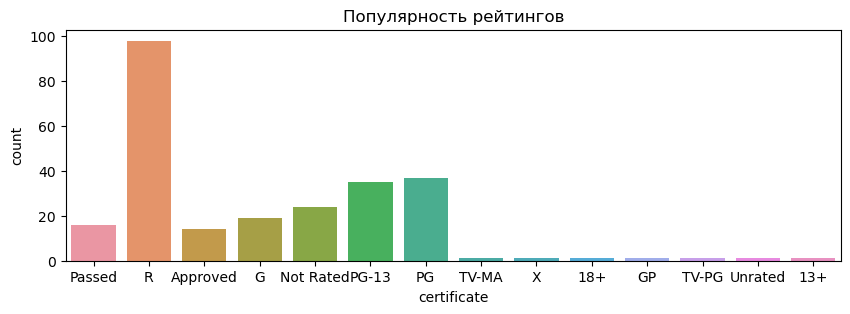

In [164]:
plt.figure(figsize=(10, 3))
sns.countplot(x='certificate',data= df)
plt.title("Популярность рейтингов")


### Наиболее популярны фильмы с возрастным рейтингом R

## Преобразовываем колонку с голосами

In [32]:
imbd_votes = []
for i in df['imbd_votes'].values:
    imbd_votes.append(int(i.replace(',','')))
df['imbd_votes'] = imbd_votes
df.head(2)

,rank,movie_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_id,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content
0,1,tt0111161,The Shawshank Redemption,1994,https://www.imdb.com/title/tt0111161,2711075,9.3,R,2h 22m,Drama,...,nm0001104,Frank Darabont,"nm0000175,nm0001104","Stephen King,Frank Darabont","Over the course of several years, two convicts...","ur16161013,ur15311310,ur0265899,ur16117882,ur1...","hitchcockthelegend,Sleepin_Dragon,EyeDunno,ale...","rw2284594,rw6606154,rw1221355,rw1822343,rw1288...","Some birds aren't meant to be caged.,An incred...",The Shawshank Redemption is written and direct...
1,2,tt0068646,The Godfather,1972,https://www.imdb.com/title/tt0068646,1882829,9.2,R,2h 55m,"Crime,Drama",...,nm0000338,Francis Ford Coppola,"nm0701374,nm0000338","Mario Puzo,Francis Ford Coppola",The aging patriarch of an organized crime dyna...,"ur24740649,ur86182727,ur15794099,ur15311310,ur...","CalRhys,andrewburgereviews,gogoschka-1,Sleepin...","rw3038370,rw4756923,rw4059579,rw6568526,rw1897...","The Pinnacle Of Flawless Films!,An offer so go...",'The Godfather' is the pinnacle of flawless fi...


In [38]:
df.imbd_votes.dtypes

dtype('int64')

## Есть ли связь между голосами и рейтингом?

Text(0, 0.5, 'Рейтинг')

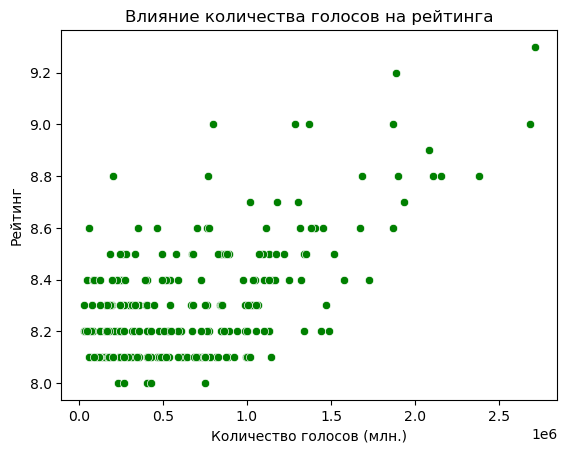

In [151]:
sns.scatterplot(x='imbd_votes',y='imbd_rating',data=df, color='green')
plt.title("Влияние количества голосов на рейтинга")
plt.xlabel("Количество голосов (млн.)")
plt.ylabel("Рейтинг")

## Ответ: Да

## Преобразовываем продолжительность фильма в минуты

In [39]:
duration = []
for i in df['duration'].values:
    if 'h' in i and 'm' in i:
        duration.append((int(i.split(' ')[0].replace('h',''))* 60)  + int(i.split(' ')[1].replace('m','')))
    if 'h' in i and 'm' not in i:
        duration.append(int(i.replace('h',''))*60)
    if 'm' in i and 'h' not in i:
        duration.append(int(i.replace('m','')))
df['duration'] = duration
df.head(2)

,rank,movie_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_id,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content
0,1,tt0111161,The Shawshank Redemption,1994,https://www.imdb.com/title/tt0111161,2711075,9.3,R,142,Drama,...,nm0001104,Frank Darabont,"nm0000175,nm0001104","Stephen King,Frank Darabont","Over the course of several years, two convicts...","ur16161013,ur15311310,ur0265899,ur16117882,ur1...","hitchcockthelegend,Sleepin_Dragon,EyeDunno,ale...","rw2284594,rw6606154,rw1221355,rw1822343,rw1288...","Some birds aren't meant to be caged.,An incred...",The Shawshank Redemption is written and direct...
1,2,tt0068646,The Godfather,1972,https://www.imdb.com/title/tt0068646,1882829,9.2,R,175,"Crime,Drama",...,nm0000338,Francis Ford Coppola,"nm0701374,nm0000338","Mario Puzo,Francis Ford Coppola",The aging patriarch of an organized crime dyna...,"ur24740649,ur86182727,ur15794099,ur15311310,ur...","CalRhys,andrewburgereviews,gogoschka-1,Sleepin...","rw3038370,rw4756923,rw4059579,rw6568526,rw1897...","The Pinnacle Of Flawless Films!,An offer so go...",'The Godfather' is the pinnacle of flawless fi...


In [40]:
df.duration.dtypes

dtype('int64')

## Сортировка по продолжительности

In [64]:
df = df.sort_values(by='duration',ascending = False)

In [107]:
# самый длинный фильм
df.head(1)

,rank,movie_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_id,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content
158,159,tt0031381,Gone with the Wind,1939,https://www.imdb.com/title/tt0031381,319434,8.2,Passed,238,"Drama,Romance,War",...,"nm0281808,nm0002030,nm0939992","Victor Fleming,George Cukor,Sam Wood","tt0031381,nm0593565,nm0397608,nm0308177,tt0031381","Writers,Margaret Mitchell,Sidney Howard,Oliver...",American motion picture classic in which a man...,"ur1406078,ur2483625,ur2467618,ur4103165,ur5843...","jotix100,bkoganbing,planktonrules,Xstal,Turani...","rw1026203,rw1503022,rw1439927,rw6134854,rw5817...","Georgia on my mind,Scarlett's So High Spirited...",This film shows the best of the American cinem...


In [133]:
# Самый короткий фильм
df.tail(1)

,rank,movie_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_id,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content
194,195,tt0015324,Sherlock Jr.,1924,https://www.imdb.com/title/tt0015324,51440,8.2,Passed,45,"Action,Comedy,Romance",...,nm0000036,Buster Keaton,"nm0369841,nm0593477,nm0115669","Jean C. Havez,Joseph A. Mitchell,Clyde Bruckman","A film projectionist longs to be a detective, ...","ur1174211,ur5527588,ur4103165,ur0137908,ur0100...","Snow Leopard,imogensara_smith,Xstal,didi-5,up2...","rw0003413,rw1473937,rw6102574,rw1476358,rw1306...","Astounding Creativity,Through the Movie Screen...",It's almost impossible to describe the astound...


In [141]:
print('Cредняя продолжительность фильмов', round(df.duration.mean()),'мин.,\
    а медиана продолжительности фильмов', round(df.duration.median()), 'мин.')

Cредняя продолжительность фильмов 129 мин.,а медиана продолжительности фильмов 126 мин.


## Группировка по годам

In [168]:
years = df.groupby('year').agg({'year': ['count']}).reset_index()
years.columns = ['year','count']
years = years.sort_values(['count','year'], ascending=[False,True])
years.head(10)

,year,count
58,1995,8
67,2004,7
22,1957,6
62,1999,6
66,2003,6
72,2009,6
82,2019,6
38,1975,5
57,1994,5
60,1997,5


Text(0.5, 1.0, 'Топ 10 лет с наибольшим количеством фильмов')

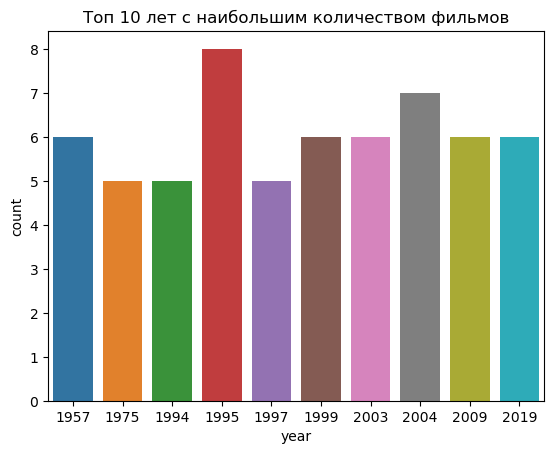

In [74]:
years_top = years.head(10)
sns.barplot(x='year',y='count',data=years_top)
plt.title("Топ 10 лет с наибольшим количеством фильмов")

### Посмотрим из каких десятилетий больше всего попало фильмов в рейтинг

In [152]:
df.year.min()

1921

In [156]:
df.year.max()

2022

In [160]:
def Decade(year):
    if year <= 1929:
        return '1920-е'
    elif year <= 1939:
        return '1930-е'
    elif year <= 1949:
        return '1940-е'
    elif year <= 1959:
        return '1950-е'
    elif year <= 1969:
        return '1960-е'
    elif year <= 1979:
        return '1970-е'
    elif year <= 1989:
        return '1980-е'
    elif year <= 1999:
        return '1990-е'
    elif year <= 2009:
        return '2000-е'
    elif year <= 2019:
        return '2010-е'
    else:
        return '2020-е'

In [162]:
df['decade']=df['year'].apply(Decade)

In [170]:
df.head(1)

,rank,movie_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content,decade
158,159,tt0031381,Gone with the Wind,1939,https://www.imdb.com/title/tt0031381,319434,8.2,Passed,238,"Drama,Romance,War",...,"Victor Fleming,George Cukor,Sam Wood","tt0031381,nm0593565,nm0397608,nm0308177,tt0031381","Writers,Margaret Mitchell,Sidney Howard,Oliver...",American motion picture classic in which a man...,"ur1406078,ur2483625,ur2467618,ur4103165,ur5843...","jotix100,bkoganbing,planktonrules,Xstal,Turani...","rw1026203,rw1503022,rw1439927,rw6134854,rw5817...","Georgia on my mind,Scarlett's So High Spirited...",This film shows the best of the American cinem...,1930-е


Text(0.5, 1.0, 'Десятилетие')

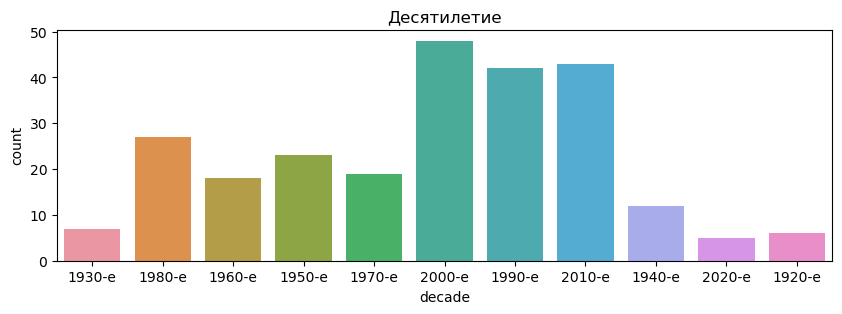

In [174]:
plt.figure(figsize=(10, 3))
sns.countplot(x='decade',data= df)
plt.title("Десятилетие")

## Посмотрим уникальные жанры

In [185]:
df['genre'].unique()

array(['Drama,Romance,War', 'Crime,Drama', 'Adventure,Biography,Drama',
       'Adventure,Drama', 'Action,Drama', 'Action,Adventure,Drama',
       'Biography,Drama,History', 'Crime,Drama,Fantasy',
       'Adventure,Drama,War', 'Drama,War', 'Adventure,Drama,Western',
       'Biography,Comedy,Crime', 'Adventure,Western',
       'Biography,Drama,Family', 'Adventure,Drama,History',
       'Comedy,Drama', 'Action,Crime,Drama', 'Adventure,Drama,Sci-Fi',
       'Drama,Western', 'Drama,Family', 'Western',
       'Action,Drama,Thriller', 'Crime,Drama,Mystery', 'Action,Drama,War',
       'Action,Biography,Drama', 'Biography,Drama,Music', 'Drama',
       'Drama,Romance', 'Drama,Thriller', 'Drama,Sci-Fi',
       'Crime,Drama,Thriller', 'Adventure,Sci-Fi',
       'Drama,Mystery,Thriller', 'Action,Adventure,Sci-Fi',
       'Action,Adventure,Fantasy', 'Drama,Mystery,War', 'Drama,Horror',
       'Drama,Romance,Thriller', 'Biography,Crime,Drama',
       'Drama,Thriller,War', 'Action,Drama,Sport', 'Myst

In [184]:
len(df['genre'].unique())

104

#### Много. Разобьём по отдельности

In [261]:
unique_genre = []
for i in df['genre'].values:
    unique_genre += i.split(',')
unique_genre = list(set(unique_genre))
unique_genre

['Romance',
 'Film-Noir',
 'Horror',
 'Family',
 'Biography',
 'Adventure',
 'Animation',
 'Sci-Fi',
 'Music',
 'Drama',
 'Western',
 'Thriller',
 'Mystery',
 'Action',
 'War',
 'Comedy',
 'Musical',
 'Crime',
 'Fantasy',
 'History',
 'Sport']

In [179]:
len(unique_genre)

21

## Посмотрим сколько фильмов в каждом жанре

In [262]:
data = []
for i in unique_genre:
    c = 0
    for j in df.values:
        if(i in j[9]):
            c += 1
    data.append([i,c])
data

[['Romance', 23],
 ['Film-Noir', 4],
 ['Horror', 5],
 ['Family', 13],
 ['Biography', 29],
 ['Adventure', 60],
 ['Animation', 23],
 ['Sci-Fi', 20],
 ['Music', 5],
 ['Drama', 177],
 ['Western', 7],
 ['Thriller', 31],
 ['Mystery', 31],
 ['Action', 50],
 ['War', 23],
 ['Comedy', 45],
 ['Musical', 1],
 ['Crime', 51],
 ['Fantasy', 14],
 ['History', 10],
 ['Sport', 5]]

In [263]:
df_1 = pd.DataFrame(data,columns=['genre','count'])
df_1.sort_values(by='count',ascending=False)

,genre,count
9,Drama,177
5,Adventure,60
17,Crime,51
13,Action,50
15,Comedy,45
11,Thriller,31
12,Mystery,31
4,Biography,29
0,Romance,23
6,Animation,23


In [194]:
!pip install WordCloud
from wordcloud import WordCloud

     -------------------------------------- 153.3/153.3 kB 1.1 MB/s eta 0:00:00


In [269]:
text = []
for i in df['genre'].values:
    text += i.split(',')
text = ' '.join(text)

(-0.5, 399.5, 199.5, -0.5)

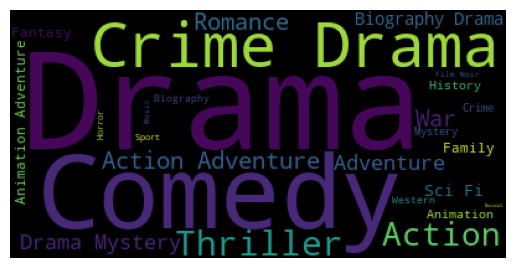

In [271]:
cloud = WordCloud().generate(text)
plt.imshow(cloud)
plt.axis('off')